# Isotropic Velocities Analysis

Let's first import the Isotropy class from santex for Isotropic velocities analysis

In [1]:
from santex import Isotropy
import numpy as np

# Define isotropy instance

We first create an instance of isotropy class by invoking ```isotropy = Isotropy()```

In [2]:
isotropy = Isotropy()

# Get Available phases

Let's check the available materials on which we can get the isotropic wave velocities at different pressure and temperature profile

In [3]:
isotropy.get_available_phases()

######################Available Phases######################
Material id: aqz       Material name: Alpha-Quartz
######################Available Phases######################
Material id: bqz       Material name: Beta-Quartz
######################Available Phases######################
Material id: coe       Material name: Coesite
######################Available Phases######################
Material id: hAb       Material name: High-T Albite
######################Available Phases######################
Material id: lAb       Material name: Low-T Albite
######################Available Phases######################
Material id: an       Material name: Anorthite
######################Available Phases######################
Material id: or       Material name: Orthoclase
######################Available Phases######################
Material id: san       Material name: Sanidine
######################Available Phases######################
Material id: alm       Material name: Almandine
###########

['aqz',
 'bqz',
 'coe',
 'hAb',
 'lAb',
 'an',
 'or',
 'san',
 'alm',
 'gr',
 'py',
 'fo',
 'fa',
 'en',
 'fs',
 'mgts',
 'di',
 'hed',
 'jd',
 'ac',
 'cats',
 'gl',
 'fgl',
 'tr',
 'fact',
 'ts',
 'parg',
 'hb',
 'anth',
 'phl',
 'ann',
 'mu',
 'cel',
 'ta',
 'clin',
 'daph',
 'atg',
 'zo',
 'cz',
 'ep',
 'law',
 'pre',
 'pump',
 'lmt',
 'wrk',
 'br',
 'chum',
 'phA',
 'sill',
 'ky',
 'sp',
 'herc',
 'mt',
 'ilm',
 'rut',
 'ttn',
 'crd',
 'scap',
 'cc',
 'arag',
 'mag']

# Get phase constants for eg Forsterite

Following are the information we get when we invoke the method ```get_phase_constants()```

1. rho0: initial density
2. ao: coefficient of thermal expansion
3. akt0: isothermal bulk modulus, which is a measure of a material's resistance to compression under uniform pressure
4. dkdp: pressure derivative of the bulk modulus, indicating how the bulk modulus changes with pressure
5. amu0: shear modulus of the mineral. The shear modulus measures a material's resistance to deformation by shear stress
6. dmudp: pressure derivative of the shear modulus, indicating how the shear modulus changes with pressure
7. gam: gamma, first thermodynamic Gruinesen parameter
8. grun: second Gruneisen parameter, which is a measure of how a material's volume changes with temperature
9. delt: Debye temperature, which is a measure of the average vibrational energy of atoms in a solid.


In [4]:
isotropy.get_phase_constants("Forsterite")

{'id': 'fo',
 'name': 'Forsterite',
 'rho0': 3222.0,
 'ao': 6.13e-05,
 'akt0': 127300000000.0,
 'dkdp': 4.2,
 'amu0': 81600000000.0,
 'dmudp': 1.6,
 'gam': 5.19,
 'grun': 1.29,
 'delt': 5.5}

# Get velocities and densities

We can get the following quantities at any given temperature and pressure for a material after invoking the method ```calculate_seismic_properties()```

1. density: density of material at any given pressure and temperature
2. aks: bulk modulus, The bulk modulus indicates how much a material will compress under pressure. 
3. amu: Shear Modulus, The shear modulus is essential for understanding a material's response to shear stress
4. vp: P-wave velocity at any given pressure and temperature
5. vs: swave velocity at any given pressure and temperature
6. vbulk: Bulk sound velocity, The velocity of sound waves traveling through a material
7. akt: Isothermal bulk modulus, Similar to the bulk modulus, but specifically refers to the resistance to compression under constant 8. temperature conditions

In [5]:
density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('Forsterite', temperature=2000, pressure=2, return_vp_vs_vbulk=True, return_aktout=True)
print(vp, vs)

7.5781436531609305 4.294565839495191


In [6]:
vp

7.5781436531609305

In [7]:
vs

4.294565839495191

In [8]:
density

3034.1119267366676

In [9]:
vs

4.294565839495191

In [10]:
vbulk

5.730428867439992

In [11]:
akt

88588086722.73985

In [12]:
density

3034.1119267366676

Let's calculate the density, seismic velocities and thermodynamic constants for the given constant temperature and varying pressures.

In [25]:
p = np.arange(0,10)
temp = np.ones(len(p)) * 1000.0

density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('fo', temperature=temp, pressure=p, return_vp_vs_vbulk=True, return_aktout=True)

[Text(0, -2.0, ''),
 Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, '')]

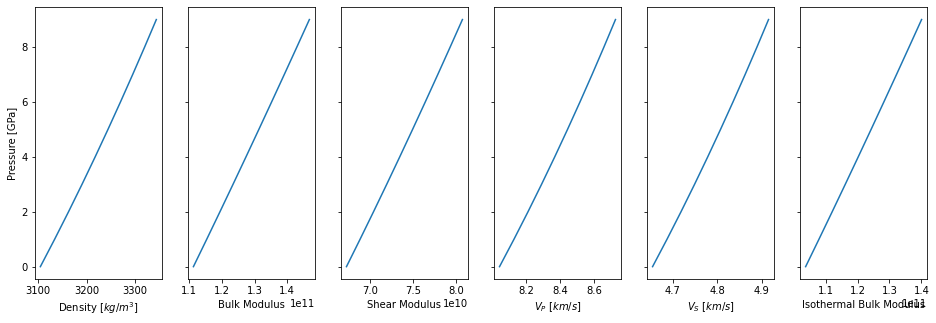

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,5))
ax = plt.subplot(161)
ax.plot(density,p)
ax.set_xlabel(r'Density [$kg/m^3$]')
ax.set_ylabel(r'Pressure [GPa]')

ax2 = plt.subplot(162)
ax2.plot(aks,p)
ax2.set_xlabel(r'Bulk Modulus')
ax2.set_yticklabels([])

ax3 = plt.subplot(163)
ax3.plot(amu,p)
ax3.set_xlabel(r'Shear Modulus')
ax3.set_yticklabels([])

ax4 = plt.subplot(164)
ax4.plot(vp,p)
ax4.set_xlabel(r'$V_P$ [$km/s$]')
ax4.set_yticklabels([])

ax5 = plt.subplot(165)
ax5.plot(vs,p)
ax5.set_xlabel(r'$V_S$ [$km/s$]')
ax5.set_yticklabels([])

ax6 = plt.subplot(166)
ax6.plot(akt,p)
ax6.set_xlabel(r'Isothermal Bulk Modulus')
ax6.set_yticklabels([])

Let's calculate the density, seismic velocities and thermodynamic constants for the given constant pressure and varying pressures.

In [27]:
temp = np.arange(600,1600)
p = np.ones(len(temp)) * 2.0

density, aks, amu, vp, vs, vbulk, akt = isotropy.calculate_seismic_properties('fo', temperature=temp, pressure=p, return_vp_vs_vbulk=True, return_aktout=True)

[Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, ''),
 Text(0, 1400.0, ''),
 Text(0, 1600.0, ''),
 Text(0, 1800.0, '')]

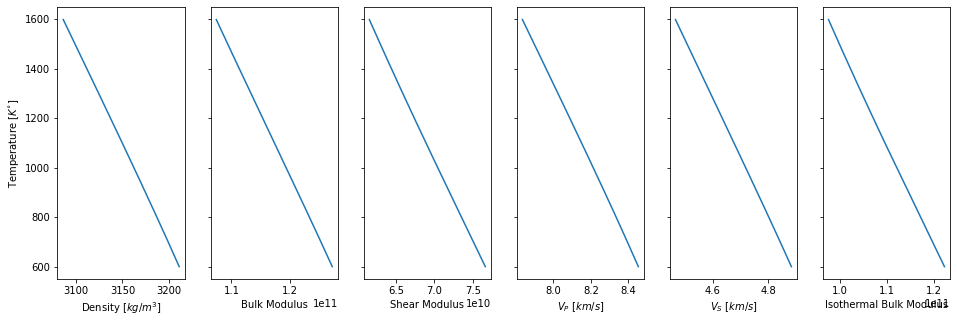

In [29]:
fig = plt.figure(figsize = (16,5))
ax = plt.subplot(161)
ax.plot(density,temp)
ax.set_xlabel(r'Density [$kg/m^3$]')
ax.set_ylabel(r'Temperature [$K^{\circ}$]')

ax2 = plt.subplot(162)
ax2.plot(aks,temp)
ax2.set_xlabel(r'Bulk Modulus')
ax2.set_yticklabels([])

ax3 = plt.subplot(163)
ax3.plot(amu,temp)
ax3.set_xlabel(r'Shear Modulus')
ax3.set_yticklabels([])

ax4 = plt.subplot(164)
ax4.plot(vp,temp)
ax4.set_xlabel(r'$V_P$ [$km/s$]')
ax4.set_yticklabels([])

ax5 = plt.subplot(165)
ax5.plot(vs,temp)
ax5.set_xlabel(r'$V_S$ [$km/s$]')
ax5.set_yticklabels([])

ax6 = plt.subplot(166)
ax6.plot(akt,temp)
ax6.set_xlabel(r'Isothermal Bulk Modulus')
ax6.set_yticklabels([])